# 🧮 Logistic Regression — From First Principles

*Implement it from scratch, understand every formula, and see why it is **classification**, not regression.*

---

## 1. What Problem Does Logistic Regression Solve?

|         | Regression models | **Logistic regression** |
|---------|------------------|-------------------------|
| **Output** | A **continuous** real number (e.g. house price) | A **probability** in *(0, 1)* → hard‐class 0 / 1 |
| **Typical question** | “How much will the house cost?” | “Will the loan be **approved (1)** or **denied (0)**?” |
| **Goal** | Minimise distance between predicted & true numbers | Maximise probability assigned to correct class |

It is therefore a **binary classifier** even though the word *regression* lingers in its name.

---

## 2. Model Equation

<div align="center">

$$
\begin{aligned}
z &= \mathbf{w}^\top \mathbf{x} + b \\[4pt]
\hat{p} &= g(z) \;=\; \frac{1}{1 + e^{-\,z}} \quad \text{(sigmoid)} \\[8pt]
g(wx + b) &= \frac{1}{1 + e^{-\,\bigl(wx + b\bigr)}} \\[8pt]
\underbrace{\hat{y}}_{\text{hard label}}
  &= 
  \begin{cases}
    1 & \text{if } \hat{p} \ge 0.5,\\[4pt]
    0 & \text{otherwise.}
  \end{cases}
\end{aligned}
$$

![Sigmoid curve — outputs stay between 0 and 1, crossing 0.5 when z = 0.](reports/figures/sigmoid.png)

</div>

* **Linear score** \(z\) measures how far a point is from the decision boundary  
* **Sigmoid** squashes any real \(z\) into a value strictly between 0 and 1  
* **Decision boundary** is the hyper-plane where \(z = 0\) (because then \(g(z)=0.5\))
- **wᵀ (w-transpose)** – the weight column-vector turned sideways into a row.  
  *Purpose:* lets us compute the dot product `wᵀ x = w1·x1 + … + wk·xk`, which equals the linear score z.

- **ŷ_hard** (“hard hat-y”) – the crisp 0 / 1 label after thresholding.  
  *Rule:* if the probability p = g(z) is ≥ 0.5, set ŷ_hard = 1; otherwise 0.  
  Needed for metrics like accuracy that expect exact class labels.

- **Soft vs. hard outputs**  
  - **Soft output:** p = g(z) – a probability strictly between 0 and 1.  
  - **Hard output:** ŷ_hard – that same probability converted to 0 or 1 by the threshold rule.

---

## 3. Why Mean-Squared Error (MSE) **Breaks Down** for Logistic Regression  

### 3.1 — What if we naïvely reused MSE?

$$
C_{\text{MSE}}(\mathbf{w}, b)
  = \frac{1}{m} \sum_{i=1}^{m} \bigl(g(z_i) - y_i\bigr)^2,
\qquad
z_i = \mathbf{w}^{\top}\mathbf{x}^{(i)} + b,
\qquad
g(z) = \frac{1}{\,1 + e^{-z}}.
$$

### 3.2 — The problem in pictures  

| Linear regression | **Logistic + MSE** |
|-------------------|--------------------|
| ![smooth U-shape](reports/figures/linear.png) | ![many bumps](reports/figures/mse_bumpy.png) |
| One clean, convex “bowl”. | Plateaus at the edges, multiple little valleys (local minima). |

### 3.3 — Why do the bumps and plateaus appear with MSE?

1. **Sigmoid saturation (flat tails)**  

   $$
   g(z)=\frac{1}{1+e^{-z}},
   \qquad
   g'(z)=g(z)\bigl(1-g(z)\bigr).
   $$

   * If $z\ll 0$ ⇒ $g(z)\approx 0$ and **$g'(z)\approx 0$** – the left tail is almost flat.  
   * If $z\gg 0$ ⇒ $g(z)\approx 1$ and **$g'(z)\approx 0$** – the right tail is almost flat.  
   These flat regions are the **plateaus** at the edges of the cost surface.
   
2. **What is $g$ and why is $g'(z)=g(z)\,[1-g(z)]$ ?**

- **Sigmoid definition**

  $$
  g(z)=\frac{1}{1+e^{-z}}
  $$

  *Range:* $0<g(z)<1$ — perfect to model probabilities.

- **Complement of the sigmoid**

  $$
  1-g(z)=\frac{e^{-z}}{1+e^{-z}}
  $$

  Both $g(z)$ and $1-g(z)$ reuse the same denominator, which makes algebra neat.

- **Differentiate step-by-step**

  1. Rewrite  

     $$
     g(z)=\bigl(1+e^{-z}\bigr)^{-1}.
     $$

  2. Apply the chain rule  

     $$
     \frac{d}{dz}\bigl(u^{-1}\bigr)=-u^{-2}\,u',
     \qquad
     u=1+e^{-z},\quad u'=-e^{-z}.
     $$

  3. Simplify  

     $$
     g'(z)=\frac{e^{-z}}{\bigl(1+e^{-z}\bigr)^{2}}
           =g(z)\,\bigl[1-g(z)\bigr].
     $$


3. **Why does $x_j$ appear in the gradient $\partial E/\partial w_j$ ?**

- **One-sample squared error**

  $$
  E=\bigl(g(z)-y\bigr)^{2},
  \qquad
  z=\mathbf{w}^{\top}\mathbf{x}+b.
  $$

- **Chain-rule expansion**

  $$
  \frac{\partial E}{\partial w_j}
    =2\bigl(g(z)-y\bigr)\,
      g'(z)\,
      \underbrace{\frac{\partial z}{\partial w_j}}_{=\,x_j}.
  $$

- **Final form**

  $$
  \boxed{\displaystyle
  \frac{\partial E}{\partial w_j}
     =2\bigl(g(z)-y\bigr)\,g'(z)\,x_j}
  $$

  The feature value $x_j$ appears because changing weight $w_j$ shifts the linear score $z$ by exactly $x_j$; larger features exert a proportionally larger influence on the gradient.
  
4. **Squared error sees only distance, not direction**  

   For one sample  
   $$
   E \;=\; \bigl(g(z)-y\bigr)^2.
   $$  

   Gradient w.r.t. a weight $w_j$:  

   $$
   \frac{\partial E}{\partial w_j}
      = 2\bigl(g(z)-y\bigr)\;g'(z)\;x_j.
   $$  

   *On the plateaus* $g'(z)\!\approx\!0$, so the gradient almost vanishes even if the prediction is wrong — optimisation “stalls” on those flats.

5. **Opposing pulls from labels 0 and 1 create ripples**  

   * A point with $y=0$ wants $g(z)\!\downarrow$ (push $z$ left).  
   * A point with $y=1$ wants $g(z)\!\uparrow$ (push $z$ right).  

   Each class digs its own shallow valley in a different region.  
   Summing all those valleys produces the **multi-hump landscape** (many local minima).

> **Result:** Gradient descent can settle in a **shallow local dip** and stop, never reaching the true global minimum.

6. **Seeing the two single-sample valleys in one picture**

![Two single-sample MSE valleys](reports/figures/wronglogmse.png)

### Turning MSE into two simple formulas  

Because  

$$
L_i(w) 
  = \bigl(g(z_i) - y_i\bigr)^2,
\qquad 
z_i = w\,x_i + b,
$$

and $y_i$ can be only **0** or **1**, you get two cases:

| True label $y_i$ | Loss expression | Behaviour vs.\ $z$ |
|------------------|-----------------|--------------------|
| 0 | $L_i = g(z)^2$ | Small when $g(z)$ is near **0** (so when $z\!\ll 0$). Large when $g(z)$ approaches 1. |
| 1 | $L_i = \bigl(1-g(z)\bigr)^2$ | Small when $g(z)$ is near **1** (so when $z\!\gg 0$). Large when $g(z)$ is near 0. |

So:  

* **For a label-0 point** the loss valley lives on the **left** side of the $z$-axis.  
* **For a label-1 point** its valley lives on the **right** side.

Stack several such valleys (one per data point) and their highs and lows add together, producing the wavy multi-dip MSE landscape we saw in Sections 3.4–3.5.

---

## 4 · Log-Loss (Cross-Entropy) — How It “Irons the Plateaus Flat”

For **each** training example the loss is  

$$
L(\hat{p},y)=
\begin{cases}
-\log(\hat{p})            & \text{if } y = 1,\\[6pt]
-\log\!\bigl(1-\hat{p}\bigr) & \text{if } y = 0.
\end{cases}
$$

* **$-\log(\hat{p})$** shoots upward as $\hat{p}\!\to 0$ &nbsp;→&nbsp; harshly punishes *confident-wrong* predictions for class 1.  
* **$-\log(1-\hat{p})$** shoots upward as $\hat{p}\!\to 1$ &nbsp;→&nbsp; harshly punishes *confident-wrong* predictions for class 0.  


| Loss curve for **$y = $**  (`- log(p)`) | Loss curve for **$y = $**  (`- log(1 – p)`) |
|------------------------------------------|----------------------------------------------|
| ![−log(p)](reports/figures/-logx.png) | ![−log(1 − p)](reports/figures/-log1-x.png) |


These logarithmic “walls” keep the gradient alive even on the sigmoid’s flat tails, so the many little valleys produced by MSE are **merged into one deep, convex bowl**.


### Average loss over the dataset  

$$
C(\mathbf{w},b)=
\frac{1}{m}\sum_{i=1}^{m}
\Bigl[-\,y_i\,\log\hat{p}_i\;-\;(1-y_i)\,\log\bigl(1-\hat{p}_i\bigr)\Bigr],
\qquad
\hat{p}_i = g\!\bigl(\mathbf{w}^{\top}\mathbf{x}^{(i)}+b\bigr).
$$

* **Correct & confident** ⟶ loss $\to 0$  
* **Wrong & confident** ⟶ loss $\to \infty$  
* The summed surface is always **smooth & convex** → gradient descent finds the single global minimum.  

### How we get the compact log-loss

Think of \(y_i\) and \(1-y_i\) as two **light-switches**:

| True label \(y_i\) | Switch \(y_i\) | Switch \(1-y_i\) |
|--------------------|---------------|------------------|
| 1 (positive class) | **1 (ON)** | 0 (OFF) |
| 0 (negative class) | 0 (OFF) | **1 (ON)** |

#### Unified log-loss formula

$$
\text{loss}_i \;=\;
-\,y_i\,\log\!\bigl(g(z_i)\bigr)
\;-\;(1-y_i)\,\log\!\bigl(1-g(z_i)\bigr)
$$

#### Check both cases  

*If \(y_i = 1\)* (first switch = 1, second = 0)

$$
\text{loss}_i \;=\; -\log\!\bigl(g(z_i)\bigr)
$$

*If \(y_i = 0\)* (first switch = 0, second = 1)

$$
\text{loss}_i \;=\; -\log\!\bigl(1 - g(z_i)\bigr)
$$

Thus the single-line formula automatically reproduces the original piece-wise definition:

$$
L\!\bigl(g(z_i),y_i\bigr)=
\begin{cases}
-\log\!\bigl(g(z_i)\bigr), & y_i = 1,\\[6pt]
-\log\!\bigl(1-g(z_i)\bigr), & y_i = 0.
\end{cases}
$$

The “switch” trick lets us write one compact formula instead of an explicit *if/else*.

---

## 5 · Gradient Descent — Fitting $w$ and $b$

> Iteratively slide **downhill** on the log-loss surface until you reach the single global bowl’s bottom.

### 5.1 Compute the gradients

For every training sample \(i\):

\[
\begin{aligned}
z_i &= \mathbf{w}^{\top}\mathbf{x}^{(i)} + b \\[4pt]
\hat{p}_i &= g(z_i)=\frac{1}{1+e^{-z_i}}
\end{aligned}
\]

Using the log-loss cost derived in Section&nbsp;4,

$$
C(\mathbf{w},b)
   =\frac{1}{m}\sum_{i=1}^{m}
     \Bigl[-\,y_i\,\log(\hat{p}_i)
           \;-\;(1-y_i)\,\log\!\bigl(1-\hat{p}_i\bigr)
     \Bigr],
\qquad
\hat{p}_i = g\!\bigl(\mathbf{w}^{\top}\mathbf{x}^{(i)} + b\bigr).
$$

**Partial derivatives**

$$
\boxed{\;
\frac{\partial C}{\partial w_j}
   = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_i - y_i)\,x_{i,j}
\;}
\qquad
\boxed{\;
\frac{\partial C}{\partial b}
   = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_i - y_i)
\;}
$$


*Reasoning:*  

$$
g'(z)=g(z)\,[1-g(z)]
\qquad\text{and}\qquad
\frac{\partial z_i}{\partial w_j}=x_{i,j}.
$$


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the current directory where the notebook is running
base_dir = os.getcwd()

# Construct the path to the CSV file inside the 'data' folder
data_path = os.path.join(base_dir, 'data', 'raw', 'datalog.csv')

# Read the CSV
training_data = pd.read_csv(data_path)

# Preview the data
print(training_data.head())








    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# 1. Drop User ID — not useful for prediction
training_data.drop(columns=["User ID"], inplace=True)

# 2. Convert Gender to numeric — Male: 1, Female: 0
training_data['Gender'] = training_data['Gender'].map({'Male': 1, 'Female': 0})

# 3. Check for missing values (important!)
print("Missing values per column:\n", training_data.isnull().sum())

# 4. Remove rows with missing values (optional: depends on dataset size)
training_data.dropna(inplace=True)

# 5. Check for duplicates (optional but good practice)
print("Duplicate rows:", training_data.duplicated().sum())
training_data.drop_duplicates(inplace=True)
print("Final Duplicate rows:", training_data.duplicated().sum())


Missing values per column:
 Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Duplicate rows: 20
Final Duplicate rows: 0


In [4]:
x_train = training_data[['Age', 'EstimatedSalary']].values   # Your two features
y_train = training_data['Purchased'].values                  # Your binary label

m, n = x_train.shape # to get the number of training examples (m) and input features (n)

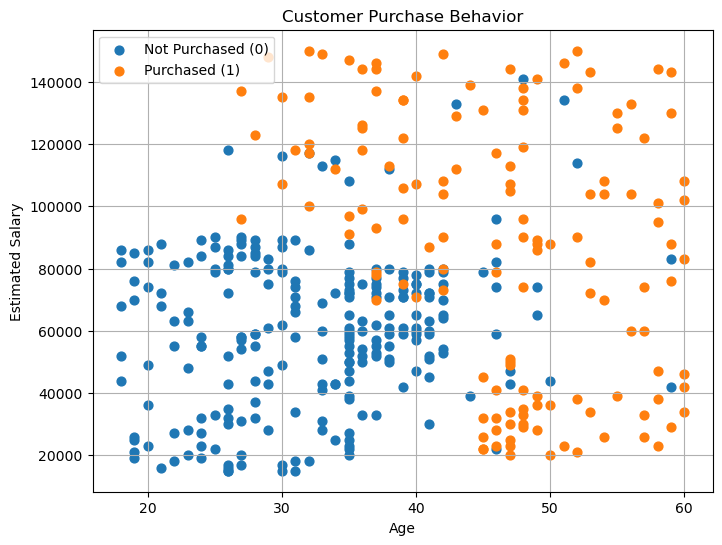

In [5]:
plt.figure(figsize=(8, 6))

# Plot class 0 (not purchased)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1],
            color='tab:blue', label='Not Purchased (0)', s=40)

# Plot class 1 (purchased)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1],
            color='tab:orange', label='Purchased (1)', s=40)

# x_train[y_train == 0, 0]  → Ages of people who didn't purchase
# x_train[y_train == 0, 1]  → Salaries of people who didn't purchase
# x_train[y_train == 1, 0]  → Ages of people who did purchase
# x_train[y_train == 1, 1]  → Salaries of people who did purchase


plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Customer Purchase Behavior")
plt.legend()
plt.grid(True)
plt.show()

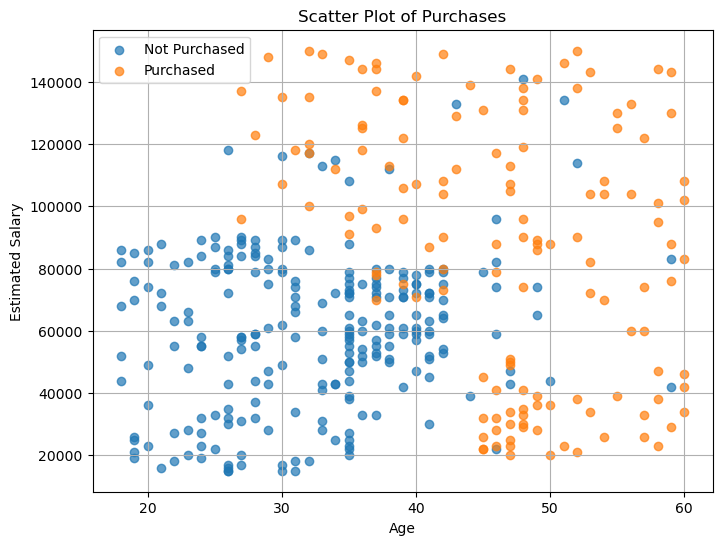

In [15]:
import matplotlib.pyplot as plt

# Separate the data based on labels (0 = not purchased, 1 = purchased)
purchased = training_data[training_data['Purchased'] == 1]
not_purchased = training_data[training_data['Purchased'] == 0]

# Create scatter plot
plt.figure(figsize=(8, 6))

# Plot people who didn't purchase
plt.scatter(not_purchased['Age'], not_purchased['EstimatedSalary'],
            color='tab:blue', label='Not Purchased', alpha=0.7)

# Plot people who did purchase
plt.scatter(purchased['Age'], purchased['EstimatedSalary'],
            color='tab:orange', label='Purchased', alpha=0.7)

# Add labels
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Scatter Plot of Purchases")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#   This is done using sklearn!!!

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split your data set -----------------------------------------

# Features and label
X_actual = training_data[['Age', 'EstimatedSalary']]  # features
y_actual = training_data['Purchased']                 # target

# Train-test split (80 % train, 20 % test)
X_train_actual, X_test_actual, y_train_actual, y_test_actual = train_test_split(
    X_actual, y_actual, test_size=0.2, random_state=42
)

# 2. Feature scaling ---------------------------------------------
scaler_actual = StandardScaler()
X_train_scaled_actual = scaler_actual.fit_transform(X_train_actual)
X_test_scaled_actual  = scaler_actual.transform(X_test_actual)

# 3. Train the Logistic Regression -------------------------------
model_actual = LogisticRegression()
model_actual.fit(X_train_scaled_actual, y_train_actual)

# 4. Make predictions --------------------------------------------
y_pred_actual = model_actual.predict(X_test_scaled_actual)

# 5. Evaluate the model ------------------------------------------
print("Confusion Matrix:\n",      confusion_matrix(y_test_actual, y_pred_actual))
print("\nClassification Report:\n", classification_report(y_test_actual, y_pred_actual))
print("\nAccuracy Score:",        accuracy_score(y_test_actual, y_pred_actual))

Confusion Matrix:
 [[41  7]
 [ 6 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.76      0.79      0.77        28

    accuracy                           0.83        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76


Accuracy Score: 0.8289473684210527


In [ ]:
# ------------------------------------------------------------------
# Sigmoid activation
# – unchanged math, but now vectorised and documented
# ------------------------------------------------------------------
def sigmoid(z):
    """
    Vectorised sigmoid.
    Parameters
    ----------
    z : ndarray or float
        Linear combination w·x + b
    Returns
    -------
    ndarray or float
        σ(z) in (0, 1)
    """
    return 1 / (1 + np.exp(-z))√√

In [ ]:
# ------------------------------------------------------------------
# Cost (cross-entropy)   ★ IMPROVED
#  • vectorised (no Python loops)
#  • log-safety via ε-clipping
# ------------------------------------------------------------------
ddef cost_function(X, y, w, b, epsilon=1e-15):
    """
    Compute average cross-entropy loss J(w, b).
    """

    # X: the feature matrix (m rows, n columns)
    # → Each row is one person/data point
    # → Each column is one feature (e.g., age, salary)
    # Shape: (m, n)
    
    # y: the true labels (0 or 1) for each row in X
    # Shape: (m,)

    # w: the weights for each feature
    # Shape: (n,) — one weight per feature

    # b: the bias term (just one number added to every row)

    # m: number of data points (rows in X)
    m = X.shape[0]  # e.g., if X has shape (100, 2), then m = 100

    # z: the raw prediction scores (before sigmoid)
    # → z = w·x + b for all rows
    # Shape: (m,) — one score per person
    z = X @ w + b

    # g: predicted probabilities (after applying sigmoid)
    # → g = probability that each row/person is class 1
    # Shape: (m,) — one probability per row
    g = sigmoid(z)

    # Clip g to avoid log(0) errors
    g = np.clip(g, epsilon, 1 - epsilon)

    # cost: average cross-entropy loss across all rows
    # → For each person, we calculate their individual loss
    # → Then sum all the losses, and divide by m to get average
    cost = -(1 / m) * np.sum(y * np.log(g) + (1 - y) * np.log(1 - g))

    return cost

# 🧠 Logistic Regression – Vectorized Explanation

---

## 📘 Example Setup

Suppose you have the following dataset of 3 people:

| Person | Age | Salary |
|--------|-----|--------|
| 1      | 22  | 40000  |
| 2      | 30  | 60000  |
| 3      | 40  | 80000  |

---

### 🟦 Feature Matrix `X`

```python
X = np.array([
    [22, 40000],
    [30, 60000],
    [40, 80000]
])  # Shape: (3, 2)

	•	Each row = one person
	•	Each column = one feature (Age, Salary)

⸻

🟥 Weight Vector w

w = np.array([0.01, 0.00002])  # Shape: (2,)

	•	One weight for each feature

⸻

➕ Bias Term b

b = 0.5  # Just a scalar


⸻

⚙️ Step 1: Linear Output (z)

Use matrix multiplication:

z = X @ w + b

Let’s compute each manually:
	•	z₁ = 22*0.01 + 40000*0.00002 + 0.5 = 0.22 + 0.8 + 0.5 = 1.52
	•	z₂ = 30*0.01 + 60000*0.00002 + 0.5 = 0.3  + 1.2 + 0.5 = 2.0
	•	z₃ = 40*0.01 + 80000*0.00002 + 0.5 = 0.4  + 1.6 + 0.5 = 2.5

So:

z = np.array([1.52, 2.0, 2.5])


⸻

⚙️ Step 2: Sigmoid Activation

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now apply sigmoid to each element in z:

g = sigmoid(z)

Which gives:

g ≈ [0.820, 0.881, 0.924]

Each value is a probability:
	•	82% chance Person 1 will buy
	•	88% for Person 2
	•	92% for Person 3

⸻

✅ Why No Loop is Needed?

NumPy automatically:
	•	Multiplies all rows in X with w using X @ w
	•	Adds b to each row
	•	Applies sigmoid() to each element in the array


In [ ]:
# ------------------------------------------------------------------
# Gradient Descent  ★ IMPROVED
#  • early-stopping option
#  • cleaner progress logging
# ------------------------------------------------------------------
def gradient_descent(X, y, alpha=0.01, iterations=10_000, tol=1e-6, print_every=1000):
    """
    Optimize w, b by batch gradient descent.

    Improvements:
    • Computes m & n internally.
    • Optional early stopping when cost change < tol.
    • Adjustable progress print frequency.
    """
    n = X.shape[1]
    w = np.zeros(n)
    b = 0.0

    prev_cost = float("inf")

    for i in range(iterations):
        grad_w, grad_b = gradient_function(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        # progress monitoring
        if i % print_every == 0 or i == iterations - 1:
            cost = cost_function(X, y, w, b)
            print(f"Iter {i:>5}: Cost {cost:.6f}")
            # early stop if improvement is tiny
            if abs(prev_cost - cost) < tol:
                print("Early stopping – cost change below tolerance.")
                break
            prev_cost = cost

    return w, b

In [ ]:
# ------------------------------------------------------------------
# Gradient  ★ IMPROVED
#  • vectorised; ∂J/∂w, ∂J/∂b in closed form
# ------------------------------------------------------------------
def gradient_function(X, y, w, b):
    """
    Compute gradients (dw, db).

    Improvements:
    • No global m/n variables.
    • Vectorised.
    """
    m = X.shape[0]
    z = X @ w + b
    g = sigmoid(z)
    error = g - y                         # shape (m,)
    grad_w = (1 / m) * (X.T @ error)      # shape (n,)
    grad_b = (1 / m) * np.sum(error)      # scalar
    return grad_w, grad_b

In [ ]:
# ------------------------------------------------------------------
# Predict labels
#  • no global m; works on any dataset size
# ------------------------------------------------------------------
def predict(X, w, b, threshold=0.5):
    """
    Predict class labels (0/1) for X.
    """
    probs = sigmoid(X @ w + b)
    return (probs >= threshold).astype(int)



In [ ]:

# ----------------------- Usage example ----------------------------
# X_train, y_train must be NumPy arrays.
# w_final, b_final = gradient_descent(X_train, y_train, alpha=0.01, iterations=5000)
# y_hat = predict(X_train, w_final, b_final)
# accuracy = np.mean(y_hat == y_train) * 100
# print(f"Training accuracy: {accuracy:.2f}%")